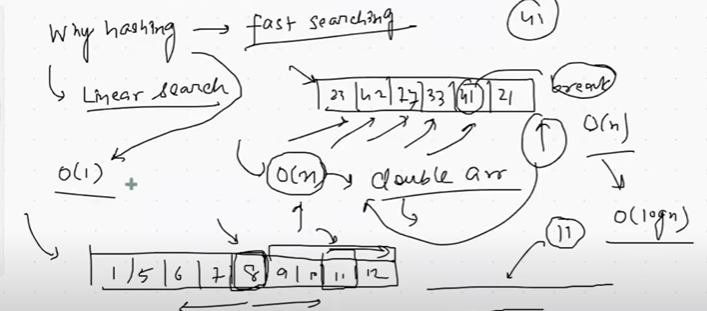

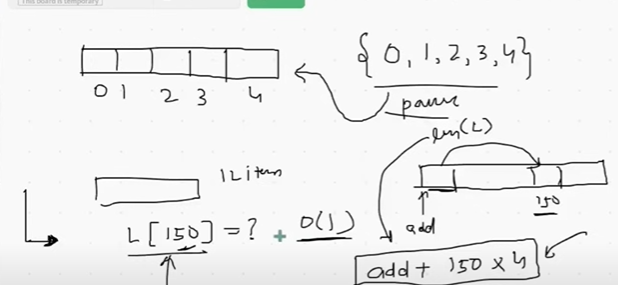

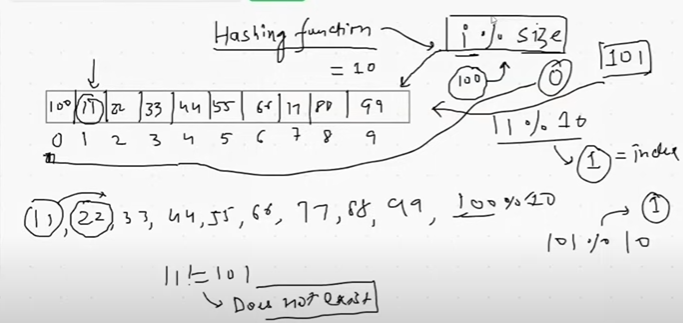

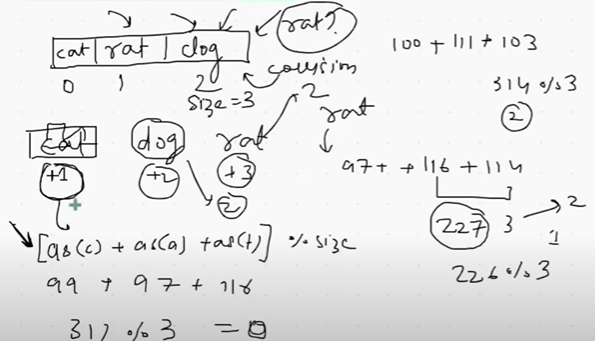

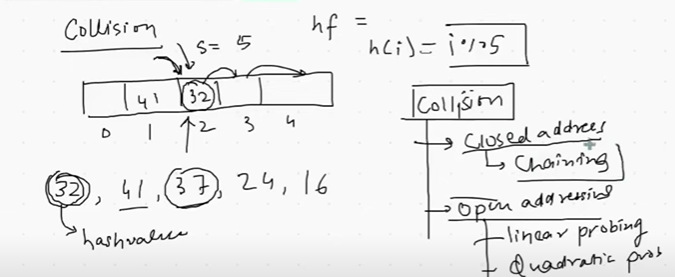

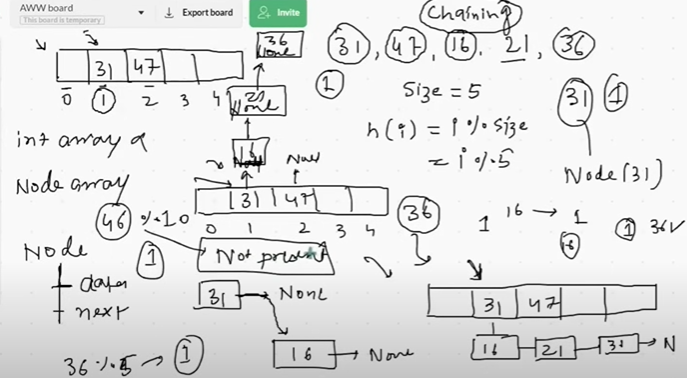

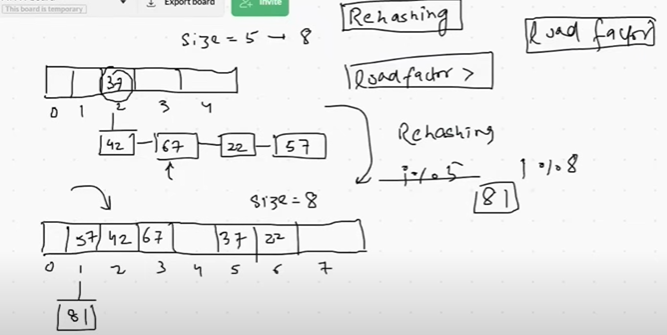

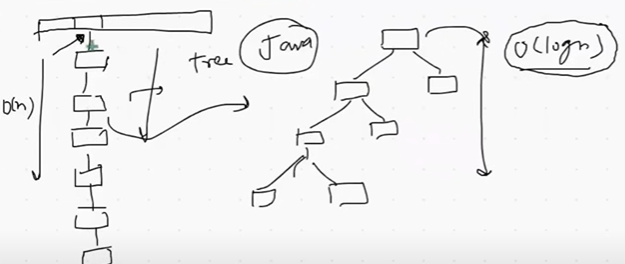

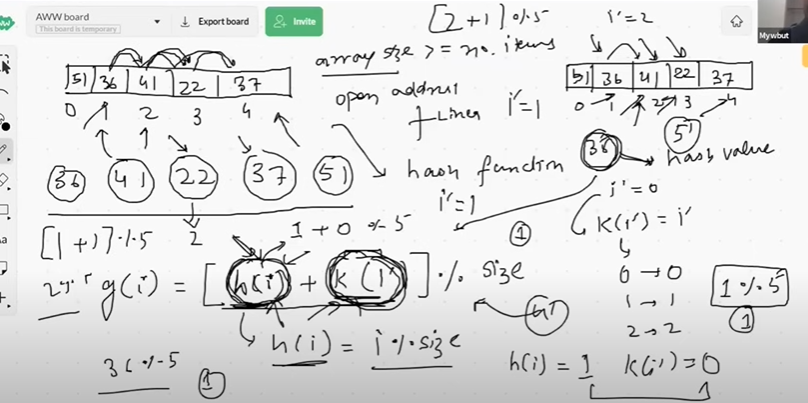

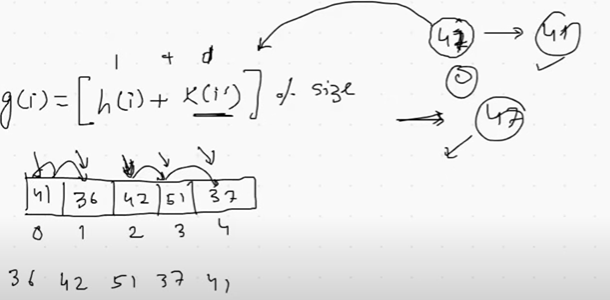

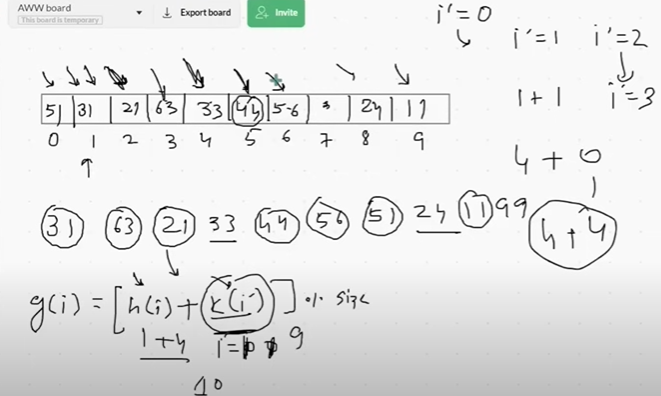

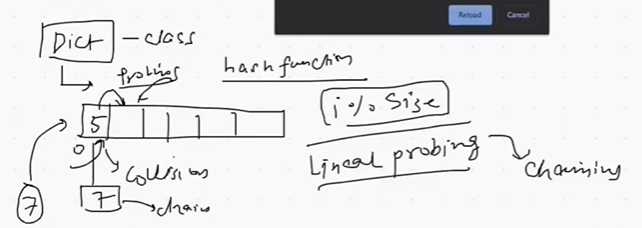

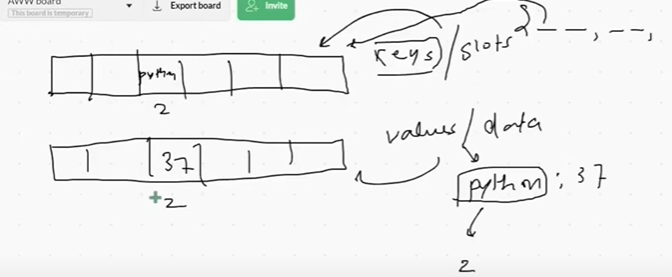

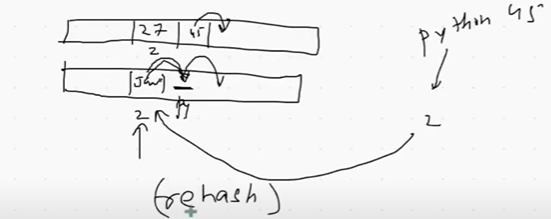

In [1]:
class Dictionary:
    def __init__(self,size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, value):
        hash_value = self.hash_function(key)
        
        if self.slots[hash_value] == None:
            self.slots[hash_value] = key
            self.data[hash_value] = value
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = value
            else:
                new_hash_value = self.rehash(hash_value)
                
                while self.slots[new_hash_value] != None and self.slots[new_hash_value] != key:
                    new_hash_value = self.rehash(new_hash_value)
                
                if self.slots[new_hash_value] == None:
                    self.slots[new_hash_value] = key
                    self.data[new_hash_value] = value
                else:
                    self.data[new_hash_value] = value 

    def get(self, key):
        start_position = self.hash_function(key) 
        current__position = start_position
        
        while self.slots[current__position] != None:
            if self.slots[current__position] == key:
                return self.data[current__position]
            current__position = self.rehash(current__position)

            if current__position == start_position:
                return "Not Found"
            
            return "None>Not Found"
            

    def __str__(self):
        for i in range(len(self.slots)):
            if self.slots[i] != None:
                print(self.slots[i],":", self.data[i], end=' ')
        return " "
    
    def __setitem__(self,key,value):
        self.put(key,value)

    def _getitem__(self,key):
        return self.get(key)

    def hash_function(self,key):
        return abs(hash(key)) % self.size
    
    def rehash(self, old_hash):
        return old_hash + 1

In [2]:
hash(3425)

3425

In [3]:
hash("sdfwe")

-1130156789342520263

In [4]:
hash((3,4,5))

4003026094496801395

In [5]:
hash([3,6,7])

TypeError: unhashable type: 'list'

In [22]:
d1 = Dictionary(6)

In [35]:
print(d1)

python : 23 cd : 34 java : 45  


In [23]:
print(d1.slots)
print(d1.data)

[None, None, None, None, None, None]
[None, None, None, None, None, None]


In [24]:
d1.put("java",45)

In [25]:
d1.put("python",56)

In [26]:
d1.put("cd", 34)

In [27]:
d1.put("python", 453)

In [28]:
d1["python"] = 23

In [29]:
print(d1.slots)
print(d1.data)

[None, None, 'python', 'cd', 'java', None]
[None, None, 23, 34, 45, None]


In [30]:
d1.get('c')

In [34]:
d1.get('php')

In [32]:
# 80801

chaining

In [84]:
class Node:
    def __init__(self,key, value):
        self.key = key
        self.value = value
        self.next = None

In [85]:
class LinkedList:

  def __init__(self):
    self.head = None

  def add(self, key, value):

    new_node = Node(key, value)

    if self.head == None:
      self.head = new_node
    else:

      temp = self.head

      while temp.next != None:
        temp = temp.next

      temp.next = new_node

  def delete_head(self):

    if self.head == None:
      return "Empty"
    else:
      self.head = self.head.next

  def remove(self, key):
    if self.head.key == key:
      self.delete_head()
      return 

    if self.head == None:
      return "Empty"
    else:

      temp = self.head

      while temp.next != None:
        if temp.next.key == key:
          break
        temp = temp.next

      if temp.next == None:
        return "Not Found"
      else:
        temp.next = temp.next.next
        

  def traverse(self):

    temp = self.head

    while temp != None:

      print(temp.key,"-->",temp.value," ", end=" ")
      temp = temp.next

  def size(self):

    temp = self.head
    counter = 0

    while temp != None:

      counter += 1
      temp = temp.next

    return counter

  def search(self,key):

    temp = self.head
    pos = 0

    while temp != None:

      if temp.key == key:
        return pos

      temp = temp.next
      pos += 1

    return -1

  def get_node_at_index(self,index):

    temp = self.head
    counter = 0

    while temp is not None:

      if counter == index:
        return temp
      temp = temp.next
      counter+=1


In [86]:
L = LinkedList()

In [89]:
L.add(4,5)

In [90]:
L.add(4,5)

In [91]:
L.add(4,5)

In [92]:
L.traverse()

4 --> 5   4 --> 5   4 --> 5   

In [93]:
L.get_node_at_index(1).key

4

0.25


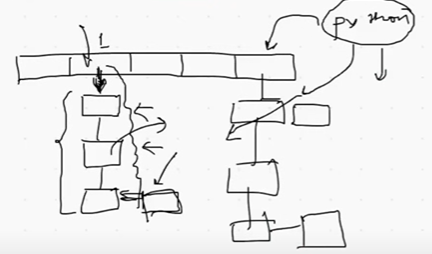

In [98]:
class Dictionary:

  def __init__(self, capacity):

    self.capacity = capacity
    self.size = 0
    # create array of LL
    self.buckets = self.make_array(self.capacity)

  def make_array(self,capacity):

    L = []
    for i in range(capacity):
      L.append(LinkedList())
    return L

  def __setitem__(self,key,value):
    self.put(key,value)

  def __getitem__(self,key):
    return self.get(key)

  def __delitem__(self,key):

    bucket_index = self.hash_function(key)

    self.buckets[bucket_index].remove(key)

  def __str__(self):

    for i in self.buckets:
      i.traverse()

    return ""

  def __len__(self):
    return self.size


  def get(self,key):

    bucket_index = self.hash_function(key)

    res = self.buckets[bucket_index].search(key)

    if res == -1:
      return "Not Present"
    else:
      node = self.buckets[bucket_index].get_node_at_index(res)
      return node.value


  def put(self, key, value):

    bucket_index = self.hash_function(key)

    node_index = self.get_node_index(bucket_index, key)

    if node_index == -1:
      # insert
      self.buckets[bucket_index].add(key,value)
      self.size+=1

      load_factor = self.size/self.capacity
      print(load_factor)

      if (load_factor >= 2):
        self.rehash()
    else:
      # update
      node = self.buckets[bucket_index].get_node_at_index(node_index)
      node.value = value

  def rehash(self):
    self.capacity = self.capacity * 2
    old_buckets = self.buckets
    self.size = 0
    self.buckets = self.make_array(self.capacity)

    for i in old_buckets:
      for j in range(i.size()):
        node = i.get_node_at_index(j)
        key_item = node.key
        value_item = node.value
        self.put(key_item,value_item)



  def get_node_index(self,bucket_index, key):

    node_index = self.buckets[bucket_index].search(key)

    return node_index

  def hash_function(self,key):
    return abs(hash(key)) % self.capacity



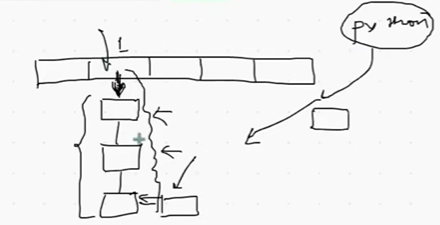

In [ ]:
D1 = Dictionary(4)

In [ ]:
D1.put("python",34)

In [101]:

D1["matlab"] = 45

0.5


In [103]:
D1.buckets

In [102]:

print(D1)

python --> 34   matlab --> 45   


In [105]:
D1.put("ruby",2200)

0.75


In [107]:
print(D1)

python --> 34   ruby --> 2200   matlab --> 45   


In [109]:
D1.buckets

In [113]:
print(D1.buckets[3].traverse())

matlab --> 45   None


In [40]:
L = []
for i in range(3):
    L.append(LinkedList())

In [41]:
print(L)

[<__main__.LinkedList object at 0x00000180F1BB0290>, <__main__.LinkedList object at 0x00000180F1B10E10>, <__main__.LinkedList object at 0x00000180F1AE5E50>]


In [42]:
type(L[0])

__main__.LinkedList

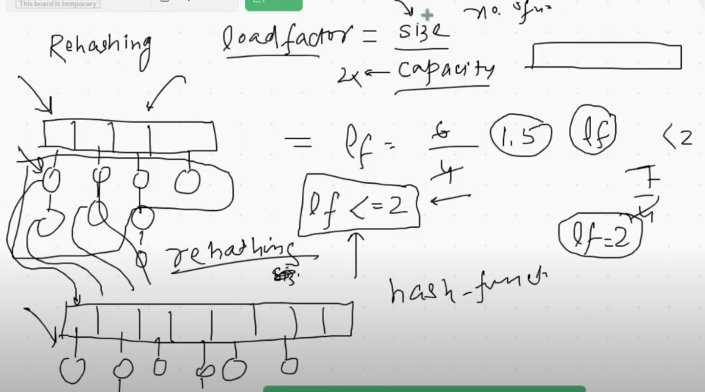